In [24]:
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd 
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import copy 
import matplotlib.pyplot as plt 
import tqdm
import ast 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
label1 = 'street_traffic'
label2 = 'street_pedestrian'
label3 = 'tram'
run_mode='scene'
Block_number=11

In [26]:
class SceneClassifier(nn.Module):
    def __init__(self):
        super(SceneClassifier, self).__init__()
        self.fc2 = nn.Linear(768, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.fc2(x))
        return x


model = SceneClassifier()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
model.eval()

199434


SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [27]:
model=torch.load(f'/Users/vayungoel/Desktop/opl/scene_maam_audioset_without_opl/small_model_scene_{Block_number}_opl.pth',map_location=torch.device('cpu'))
model

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [28]:
model.eval()

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [29]:
model.fc2.weight

Parameter containing:
tensor([[-0.0534, -0.0024, -0.0068,  ...,  0.1014,  0.0151, -0.0032],
        [-0.0248, -0.0142, -0.0497,  ...,  0.0394,  0.0004,  0.0027],
        [ 0.0772, -0.1130, -0.0270,  ...,  0.0015, -0.0055, -0.0970],
        ...,
        [-0.0151, -0.0313,  0.0127,  ...,  0.0330, -0.0031,  0.0340],
        [-0.0524, -0.0358, -0.0048,  ..., -0.1147,  0.0165, -0.0967],
        [-0.0032, -0.0061, -0.0098,  ..., -0.0347,  0.0162,  0.0235]],
       requires_grad=True)

In [30]:
data=pd.read_csv("/Users/vayungoel/Desktop/passt/final_hear21_embeddings_train_all_blocks.csv")

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [32]:
def train_ready(data,col_name):
    new_list=[]
    for i in range(len(data)):
        temp_list=[]
        x=data[col_name][i]
        tensor_string = x

# Extract the numbers part of the string
        numbers_string = tensor_string.split("[[")[1].split("]]")[0]

# Parse the string into a Python list
        tensor_list = ast.literal_eval("[" + numbers_string + "]")

# Convert the list to a numpy array
        numpy_array = np.array(tensor_list)
        list_data=list(numpy_array)
        
        new_list.append(list_data)
    return new_list

In [33]:
y=data[run_mode].tolist()
print(y)
label_array_train = np.array(y).reshape(-1, 1)
encoder=OneHotEncoder()
y_one_hot_encoded = encoder.fit_transform(label_array_train).toarray()
# print(len(y_one_hot_encoded))
y_one_hot_encoded

['airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport'

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
label1_data = data[data[run_mode] == label1]
label1_data = label1_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label1_data_x=train_ready(label1_data,col_name)
label1_data_x=np.array(label1_data_x)
label1_data_x = model(torch.from_numpy(label1_data_x).to(torch.float32))

In [35]:
label1_data_x = label1_data_x.detach().numpy()

In [36]:
label1_data_x

array([[1.4075158 , 1.6416402 , 1.2262782 , ..., 0.        , 2.2881932 ,
        0.        ],
       [2.0540211 , 1.5924159 , 1.9852533 , ..., 0.        , 1.2466841 ,
        0.        ],
       [1.8323399 , 1.9083784 , 2.3105156 , ..., 0.        , 0.8502122 ,
        0.        ],
       ...,
       [1.5846668 , 1.7771537 , 2.1971443 , ..., 0.        , 1.0676436 ,
        0.        ],
       [1.7891546 , 2.0586057 , 1.4048076 , ..., 0.        , 1.005769  ,
        0.        ],
       [1.7646849 , 1.5572969 , 1.5337069 , ..., 0.        , 0.71466005,
        0.        ]], dtype=float32)

In [37]:
label2_data = data[data[run_mode] == label2]
label2_data = label2_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label2_data_x=train_ready(label2_data,col_name)
label2_data_x=np.array(label2_data_x)
label2_data_x = model(torch.from_numpy(label2_data_x).to(torch.float32))

In [38]:
label2_data_x = label2_data_x.detach().numpy()

In [39]:
label2_data_x

array([[2.3063254 , 1.6394972 , 2.821846  , ..., 0.        , 0.2988595 ,
        0.        ],
       [1.6763699 , 1.320401  , 3.464813  , ..., 0.        , 0.04022101,
        0.        ],
       [2.065888  , 1.6771128 , 2.8742902 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38742796, 1.4222293 , 4.2342005 , ..., 0.        , 0.        ,
        0.        ],
       [1.2180688 , 1.2766579 , 3.1072302 , ..., 0.        , 0.4906847 ,
        0.        ],
       [0.8437928 , 1.9366713 , 4.2248583 , ..., 0.        , 0.13908297,
        0.        ]], dtype=float32)

In [40]:
label3_data = data[data[run_mode] == label3]
label3_data = label3_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label3_data_x=train_ready(label3_data,col_name)
label3_data_x=np.array(label3_data_x)
label3_data_x = model(torch.from_numpy(label3_data_x).to(torch.float32))

In [41]:
label3_data_x = label3_data_x.detach().numpy()

In [42]:
label3_data_x

array([[2.364344  , 1.2344753 , 0.5662806 , ..., 0.        , 1.9733988 ,
        0.        ],
       [2.3791971 , 1.2892246 , 0.01746531, ..., 0.        , 0.6411842 ,
        0.        ],
       [1.7586082 , 1.1886029 , 1.2265307 , ..., 0.        , 1.1503497 ,
        0.        ],
       ...,
       [1.9278246 , 1.515782  , 1.1263272 , ..., 0.        , 0.9585642 ,
        0.        ],
       [1.6075104 , 1.7628657 , 1.5634718 , ..., 0.        , 1.1995419 ,
        0.        ],
       [2.3312101 , 1.7904184 , 1.594981  , ..., 0.        , 1.129766  ,
        0.        ]], dtype=float32)

In [43]:
combined_data = np.vstack((label1_data_x, label2_data_x, label3_data_x))

In [44]:
pca = PCA(n_components=2)
combined_data_pca = pca.fit_transform(combined_data)

In [45]:
combined_data_pca.shape

(4178, 2)

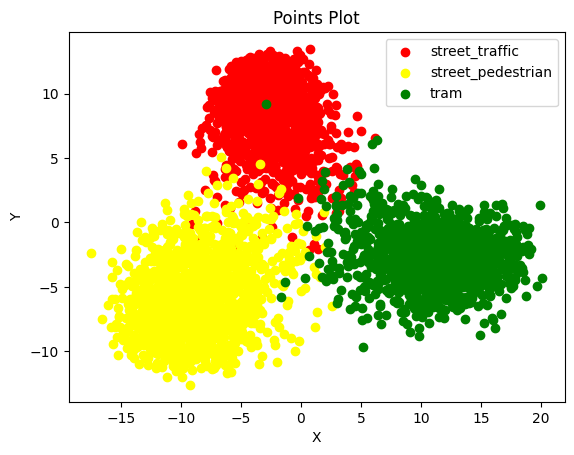

In [46]:
label1_final = combined_data_pca[0:len(label1_data_x)]
label2_final = combined_data_pca[len(label1_data_x):len(label1_data_x)+len(label2_data_x)]
label3_final = combined_data_pca[len(label1_data_x)+len(label2_data_x):]

# Plot the points with different colors
plt.scatter(label1_final[:, 0], label1_final[:, 1], color='red', label=label1)
plt.scatter(label2_final[:, 0], label2_final[:, 1], color='yellow', label=label2)
plt.scatter(label3_final[:, 0], label3_final[:, 1], color='green', label=label3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Plot')
plt.legend()
plt.show()